  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

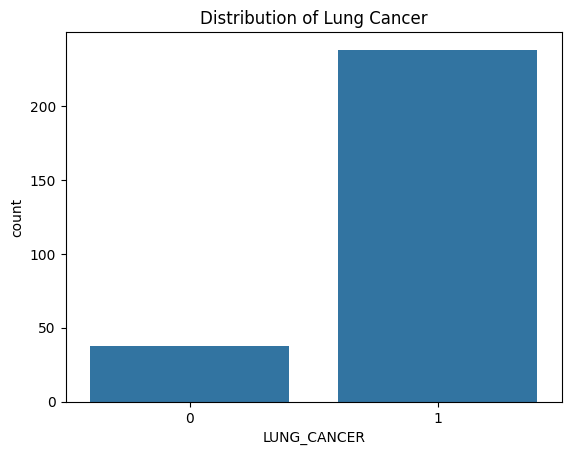

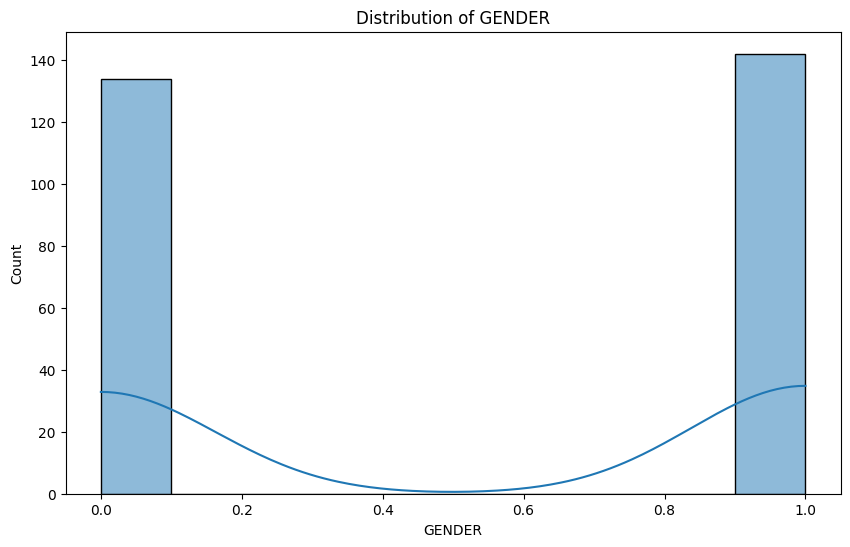

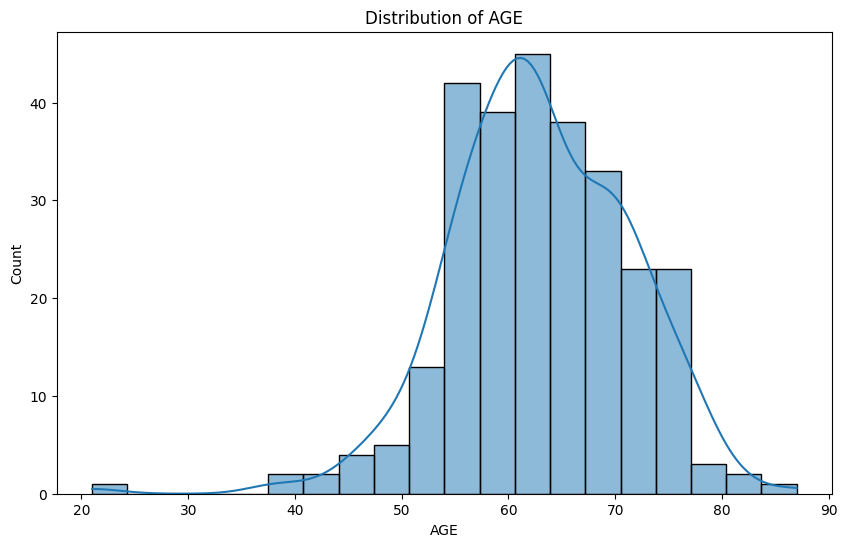

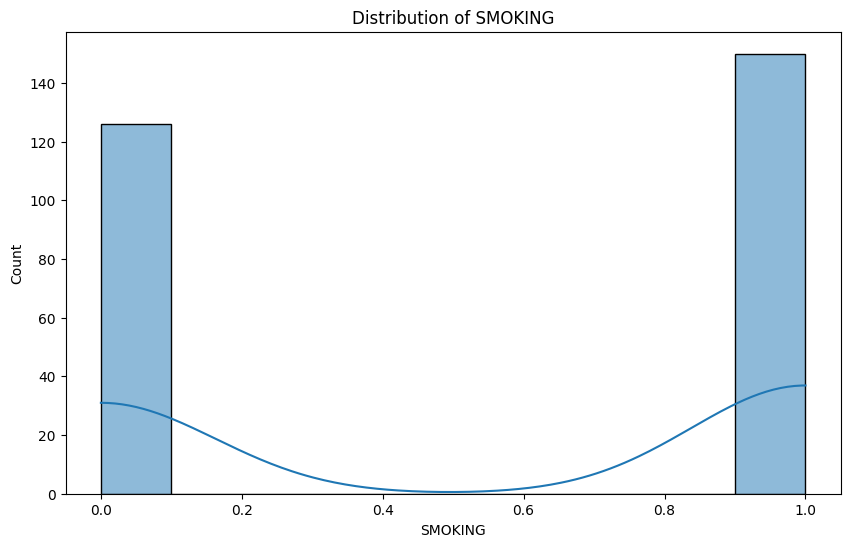

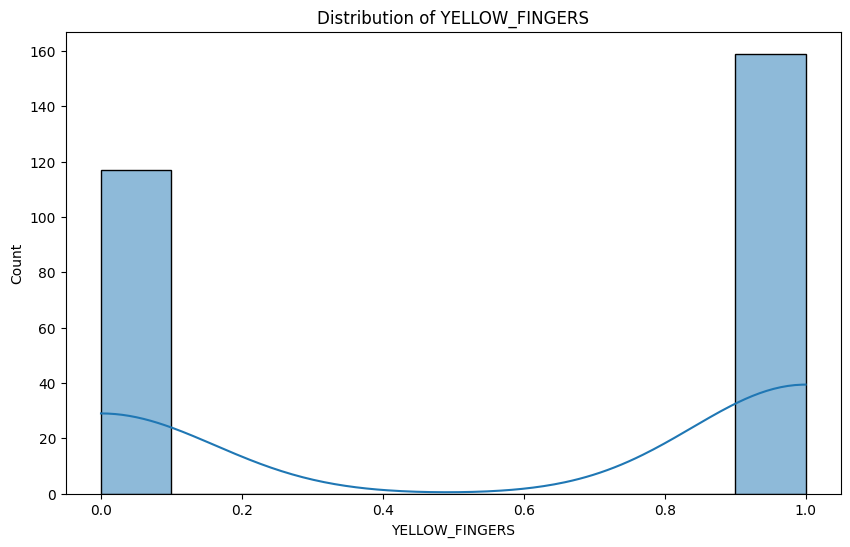

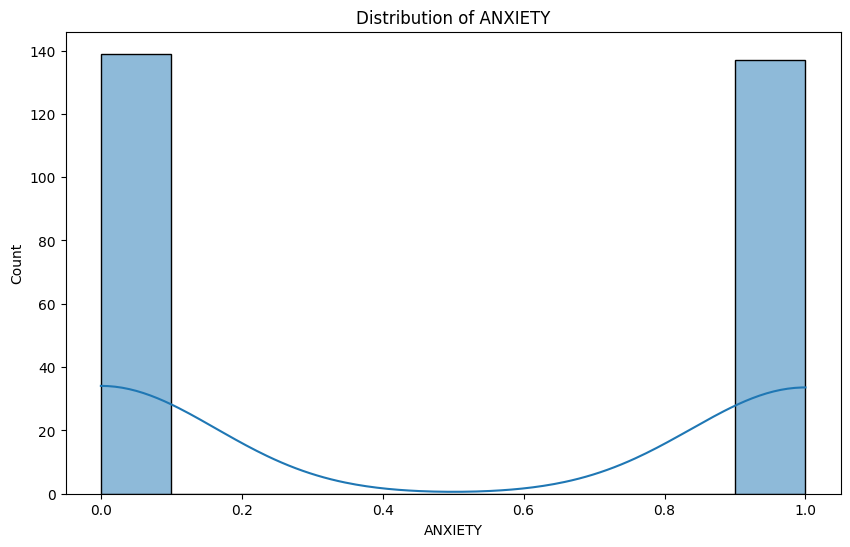

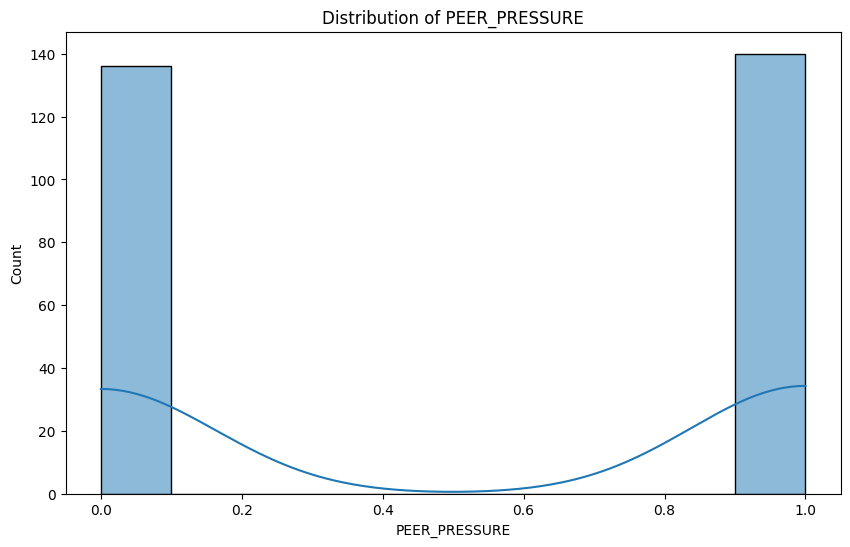

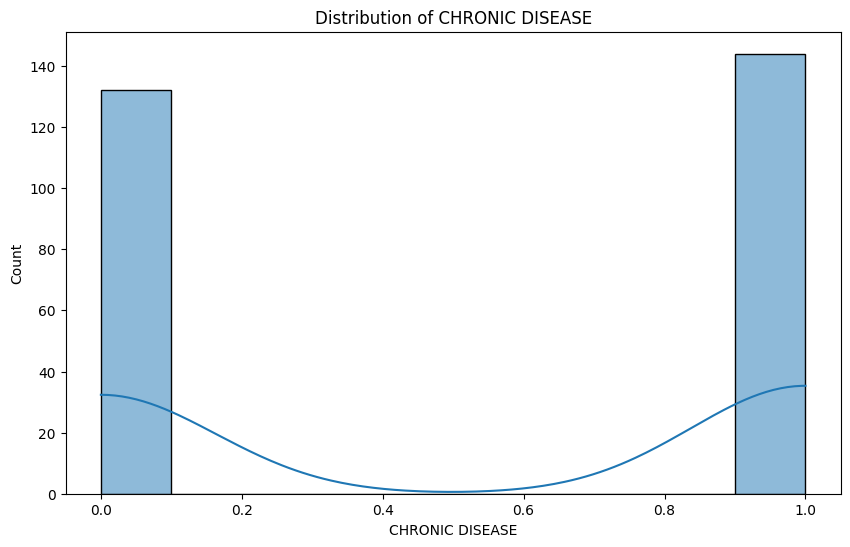

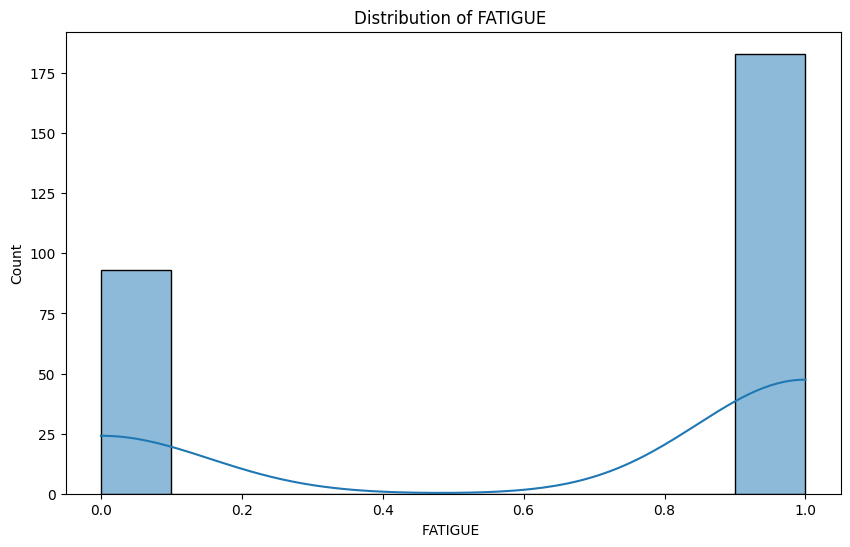

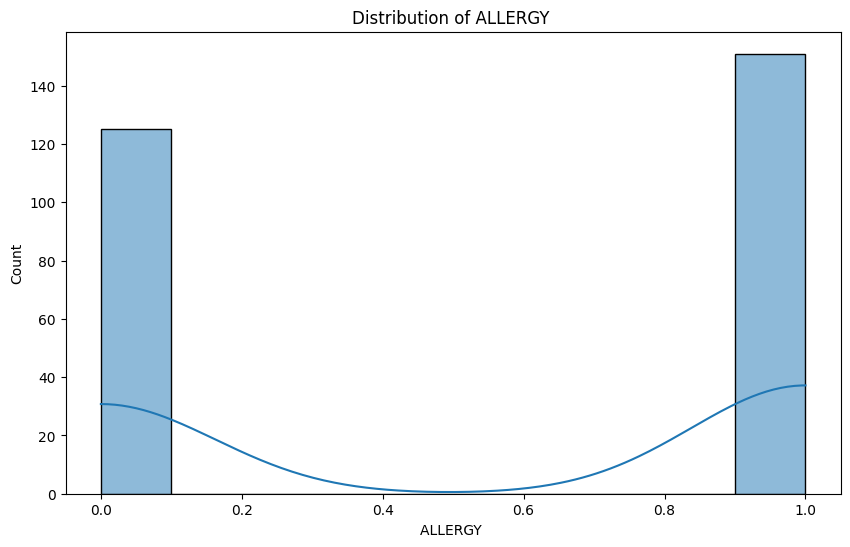

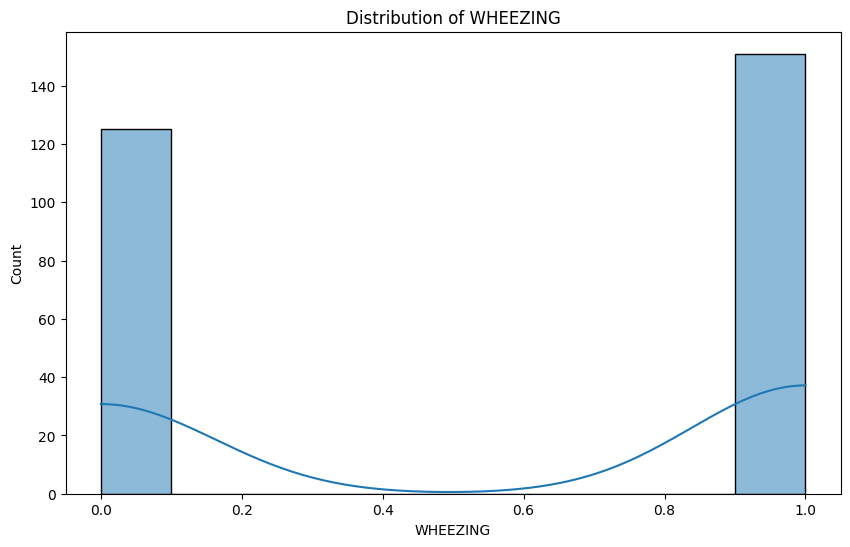

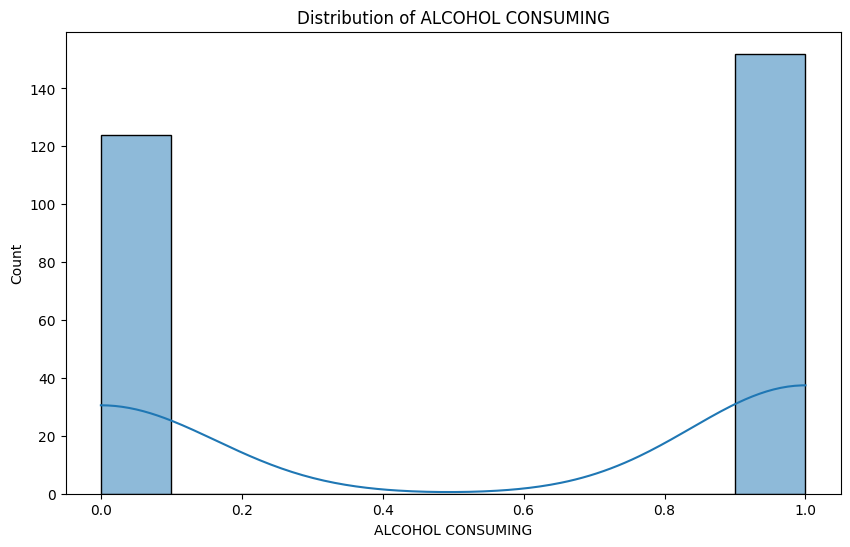

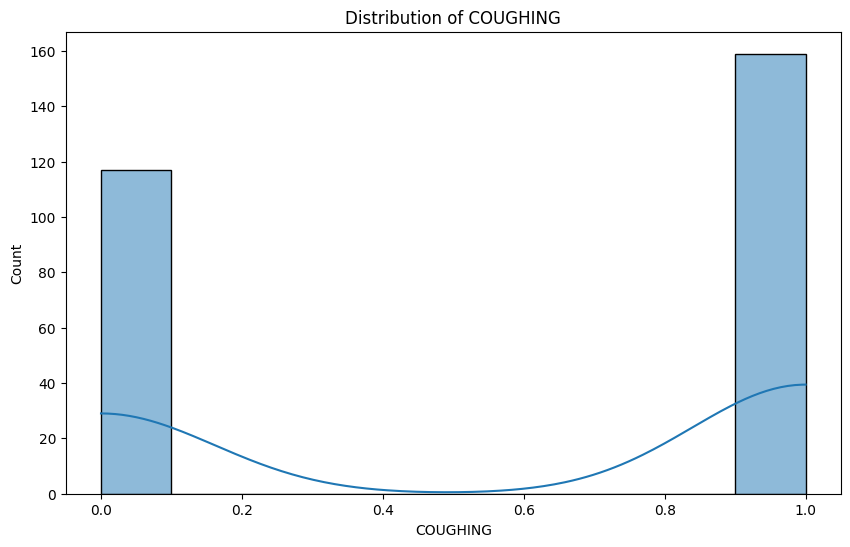

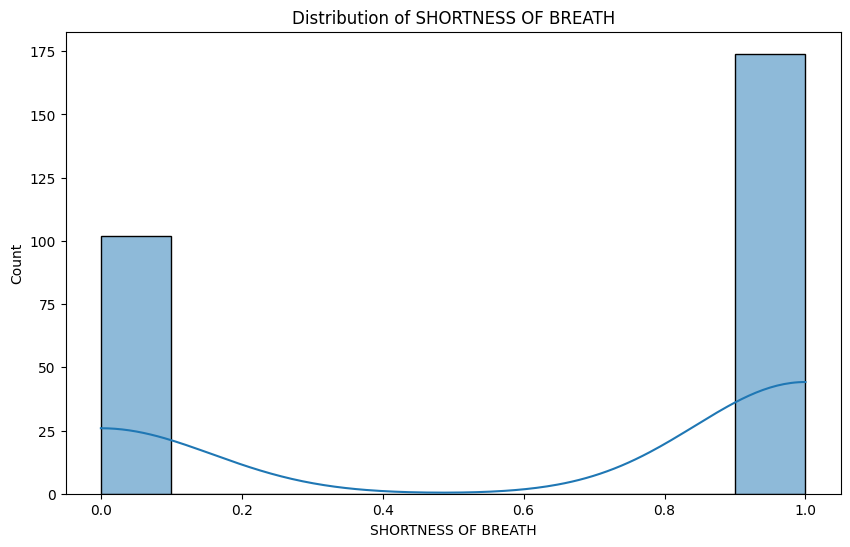

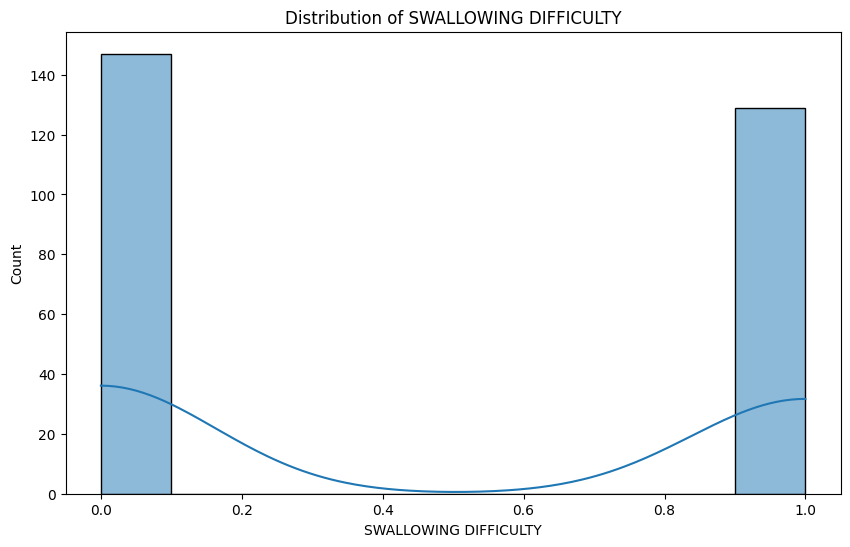

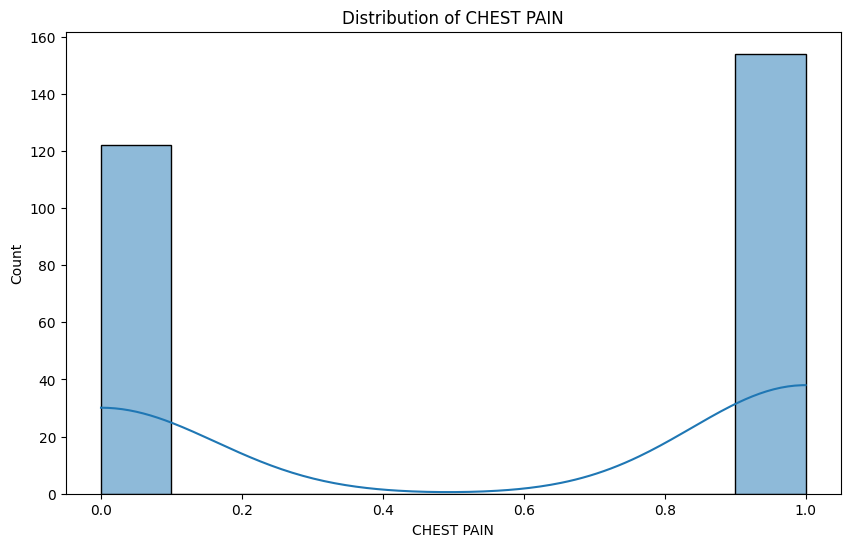

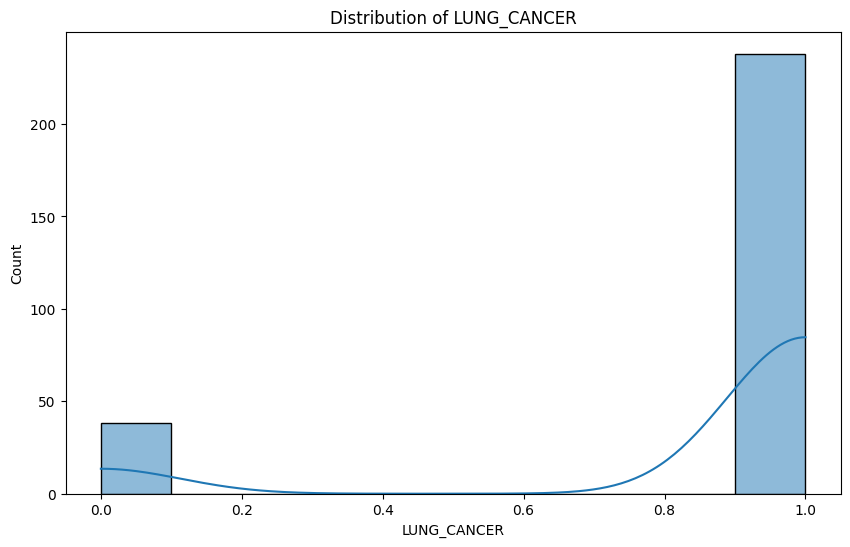

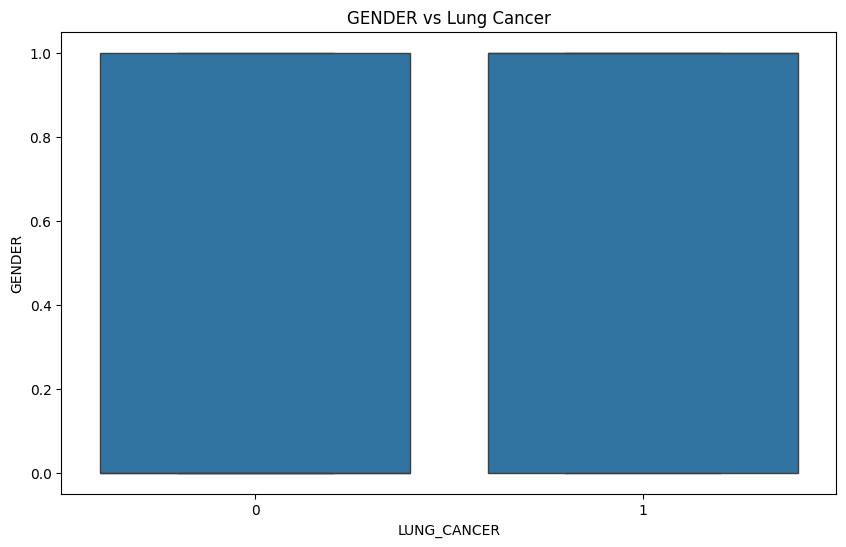

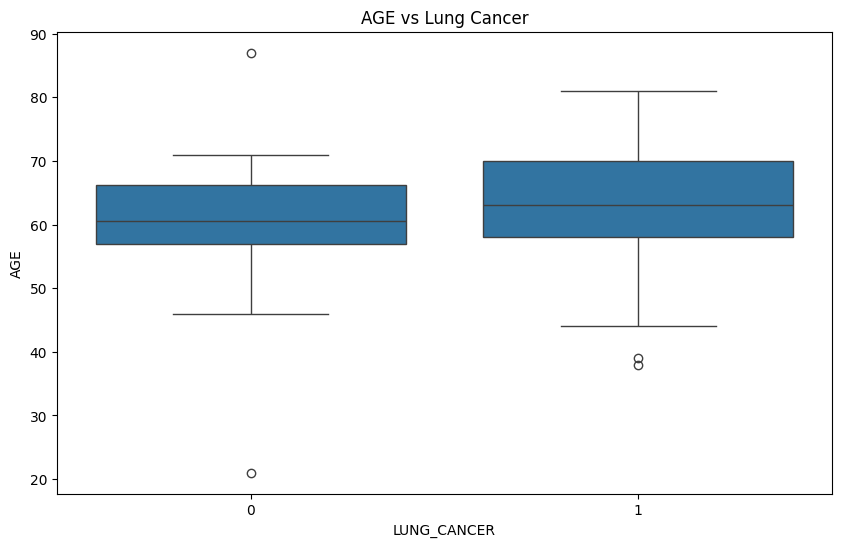

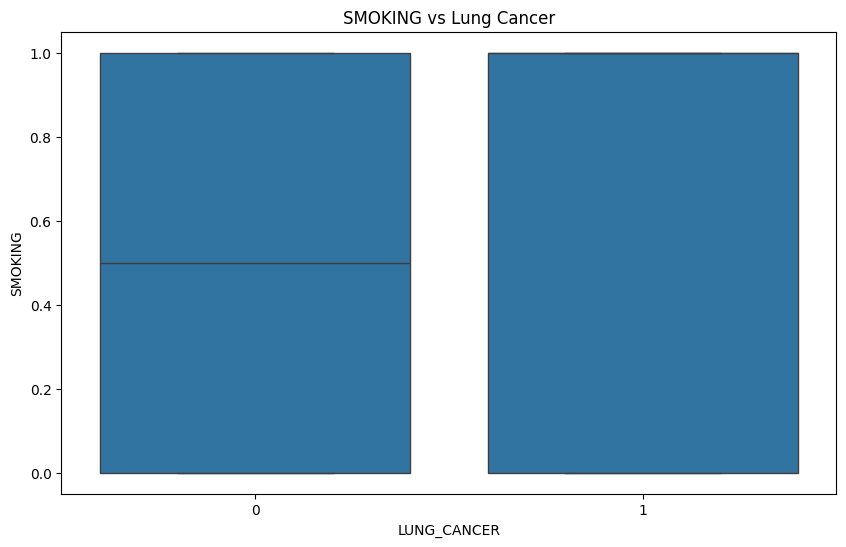

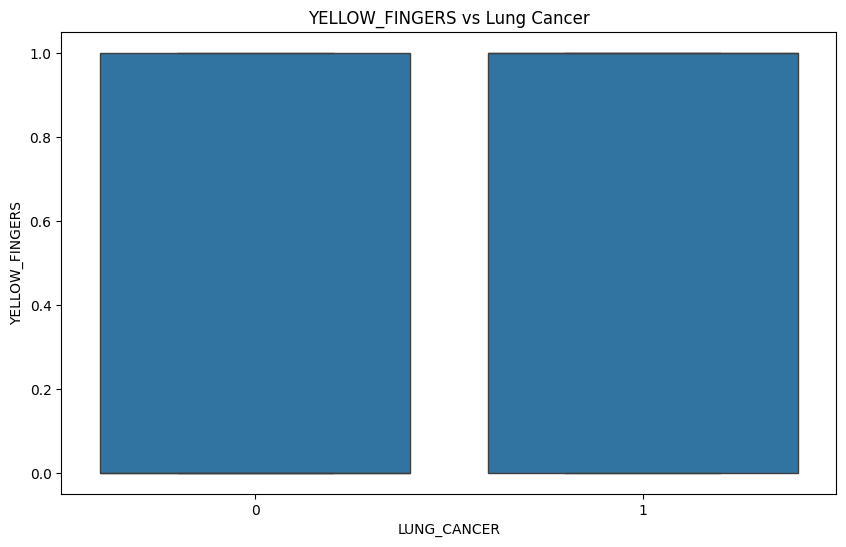

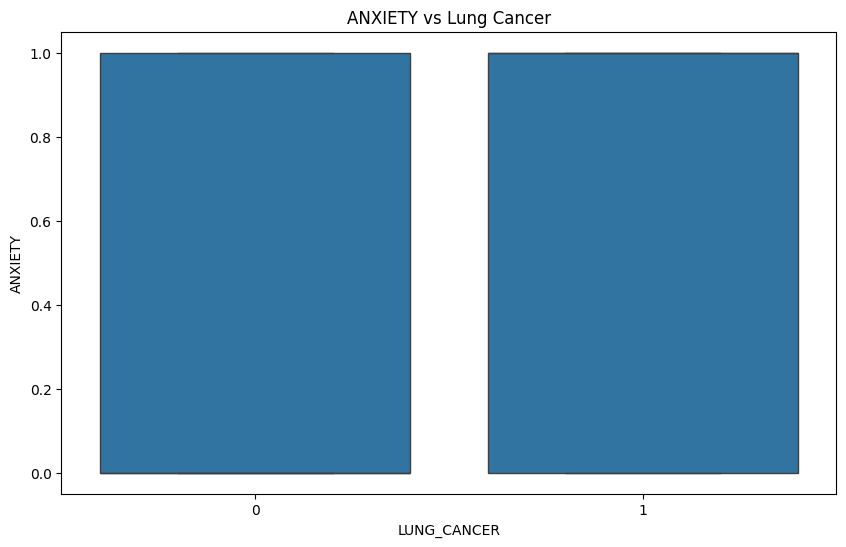

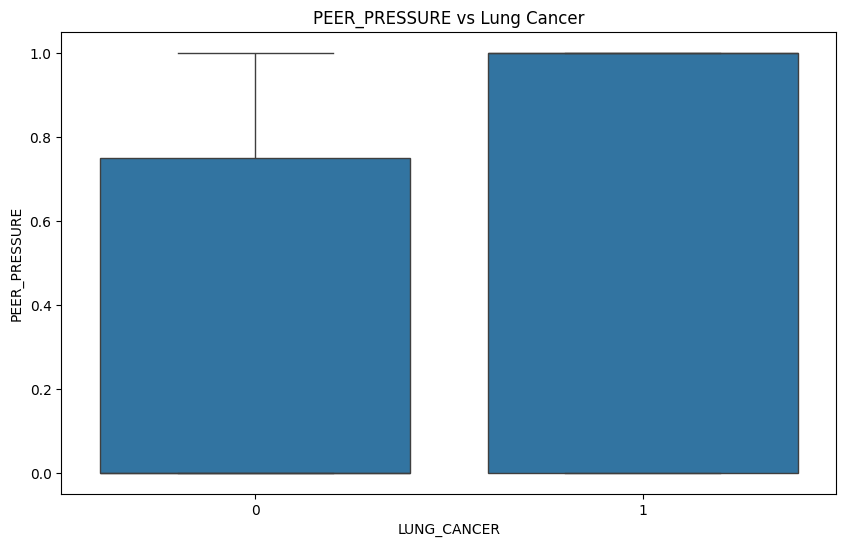

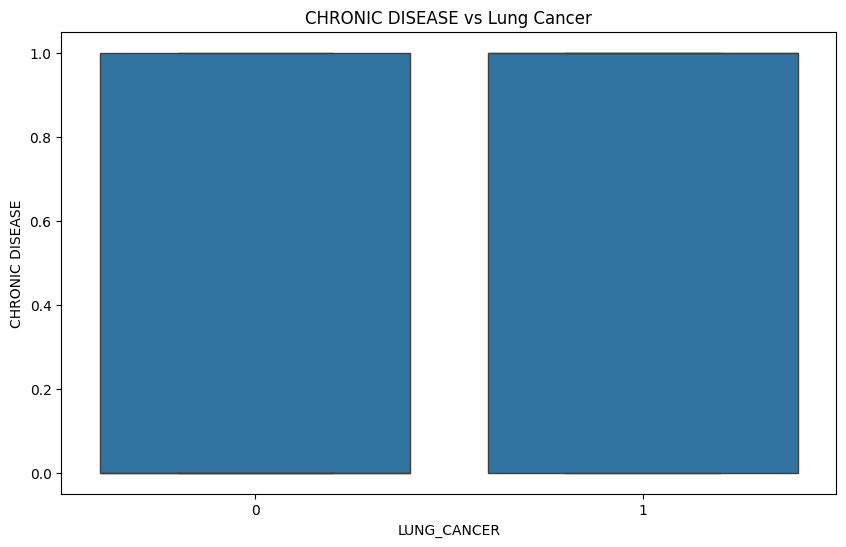

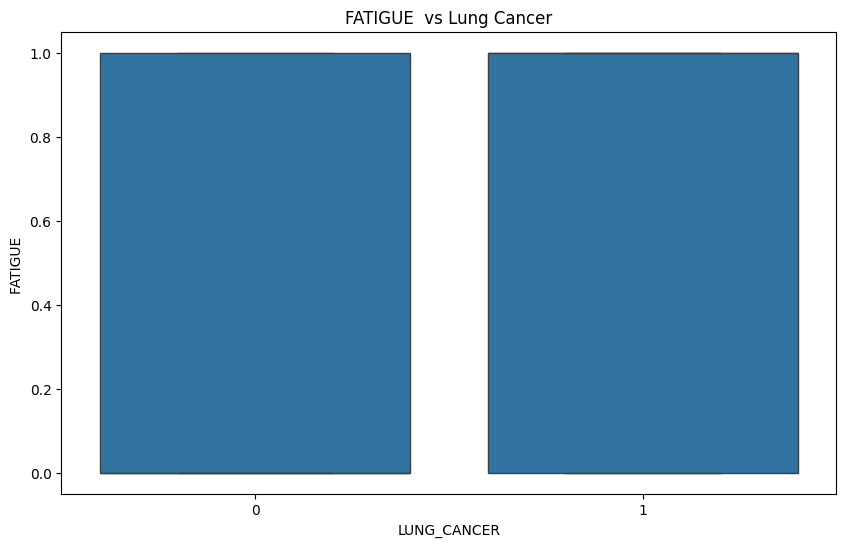

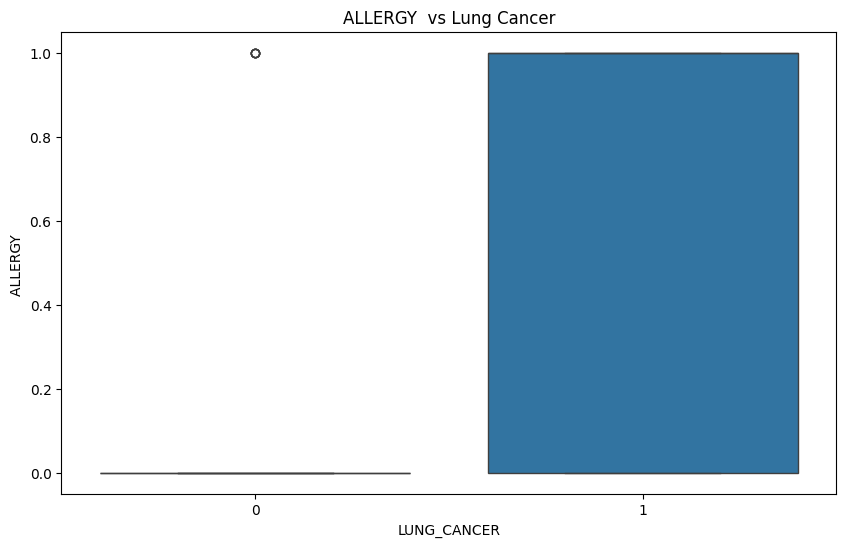

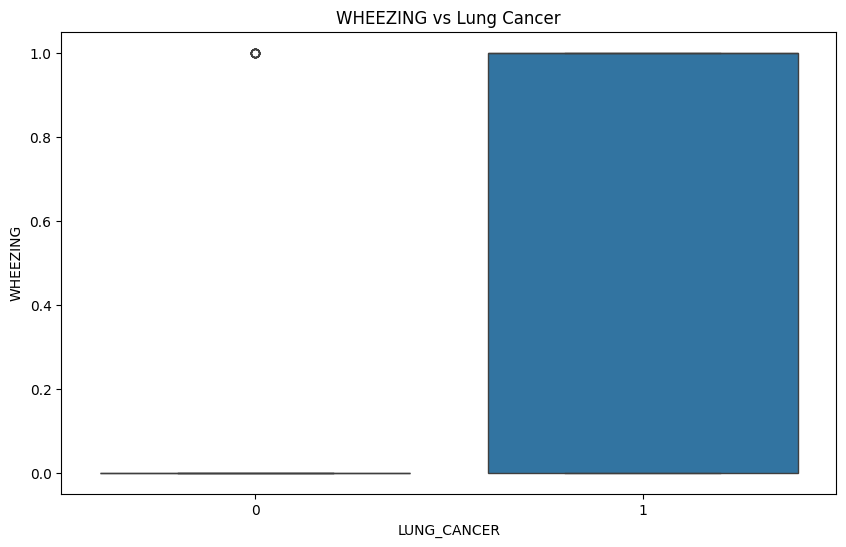

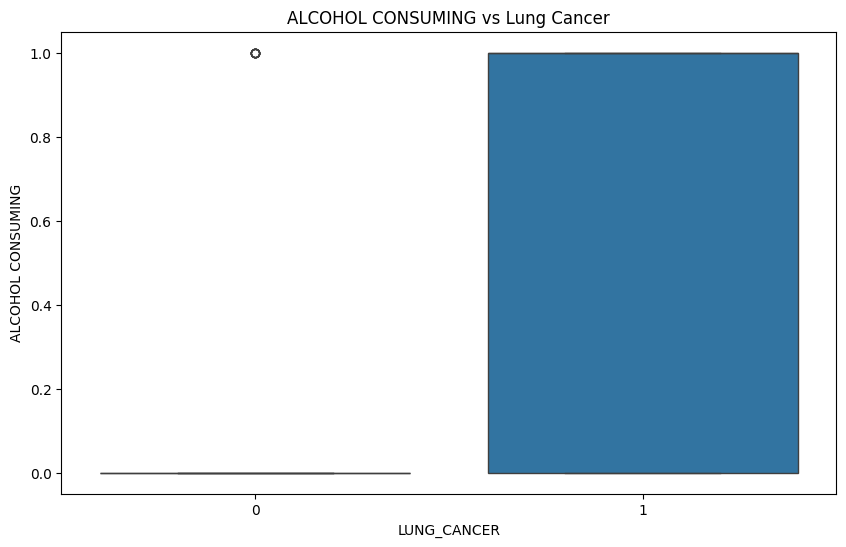

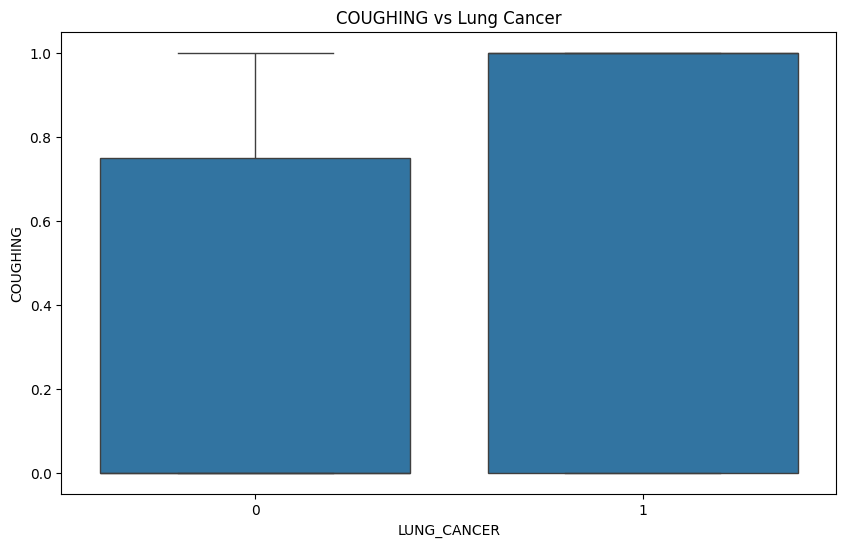

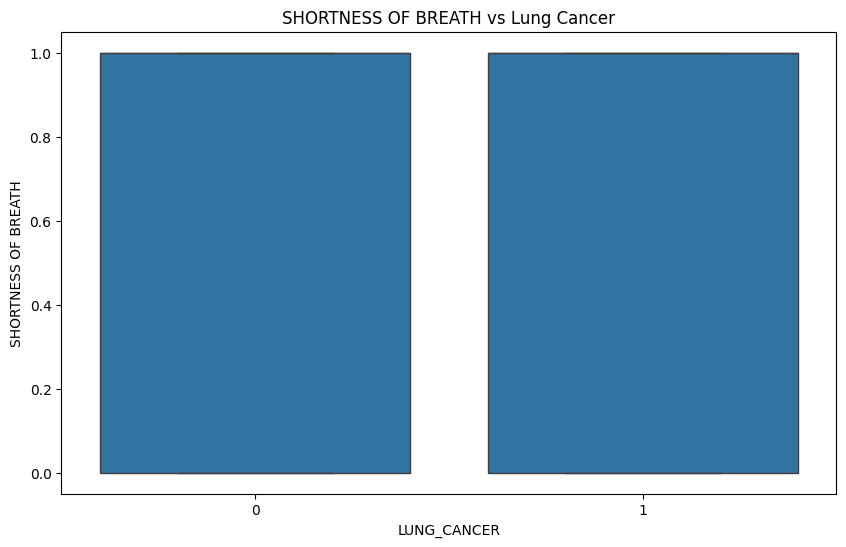

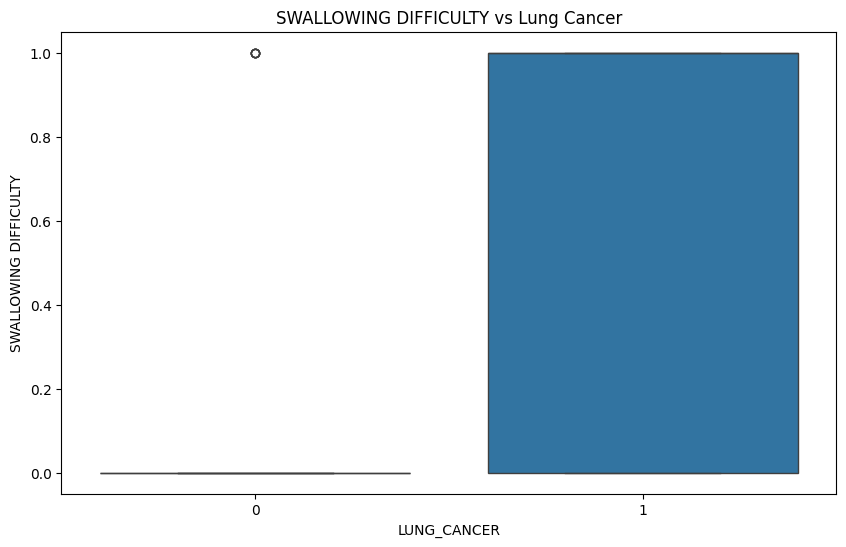

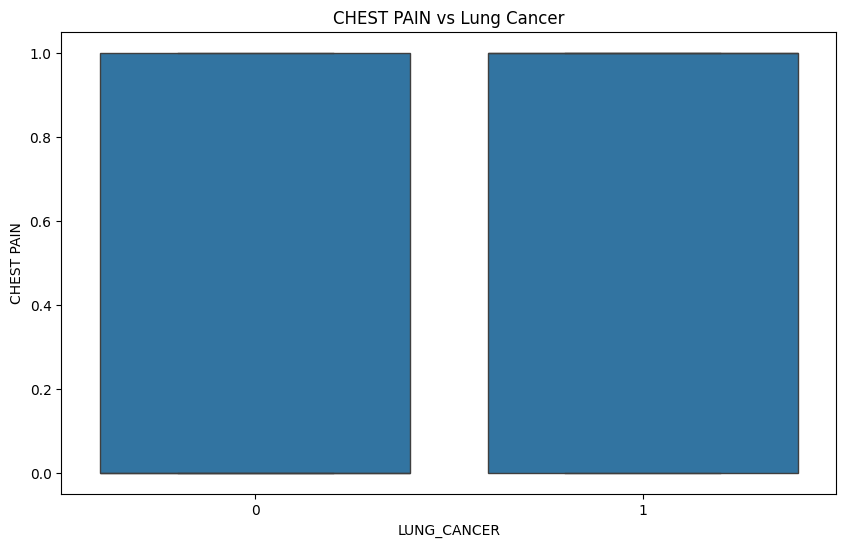

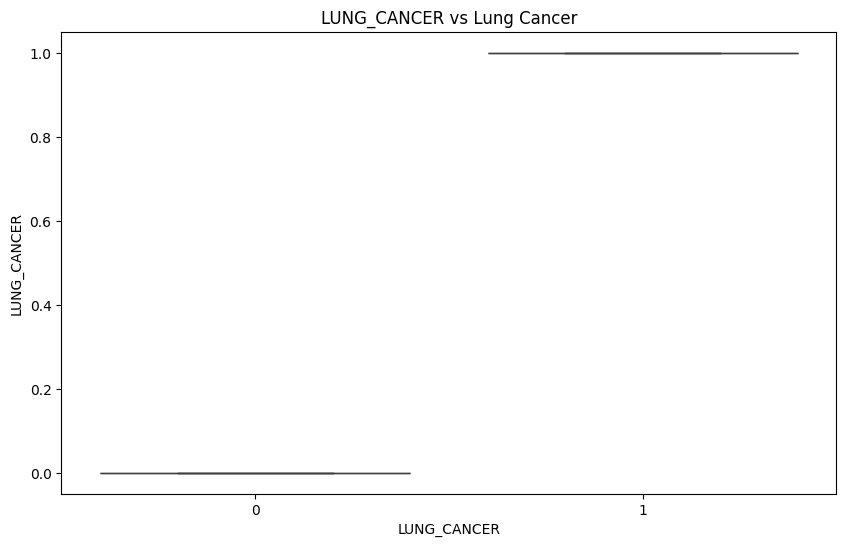

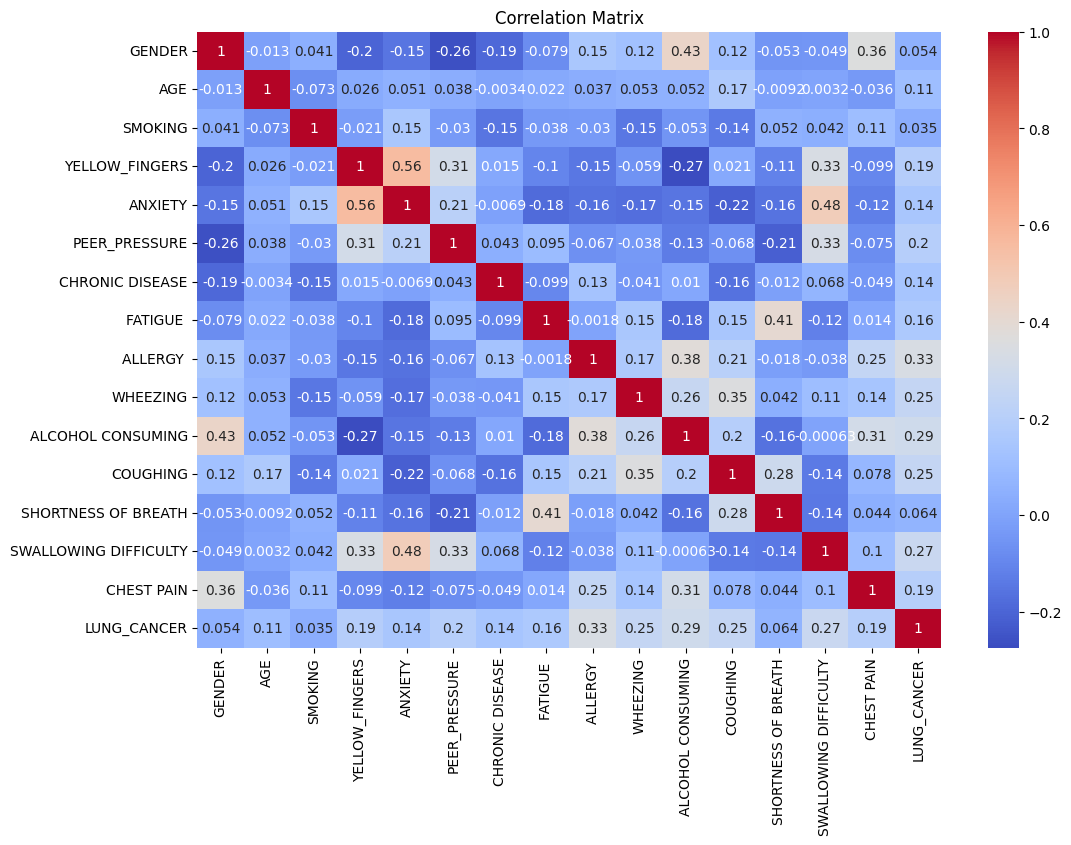

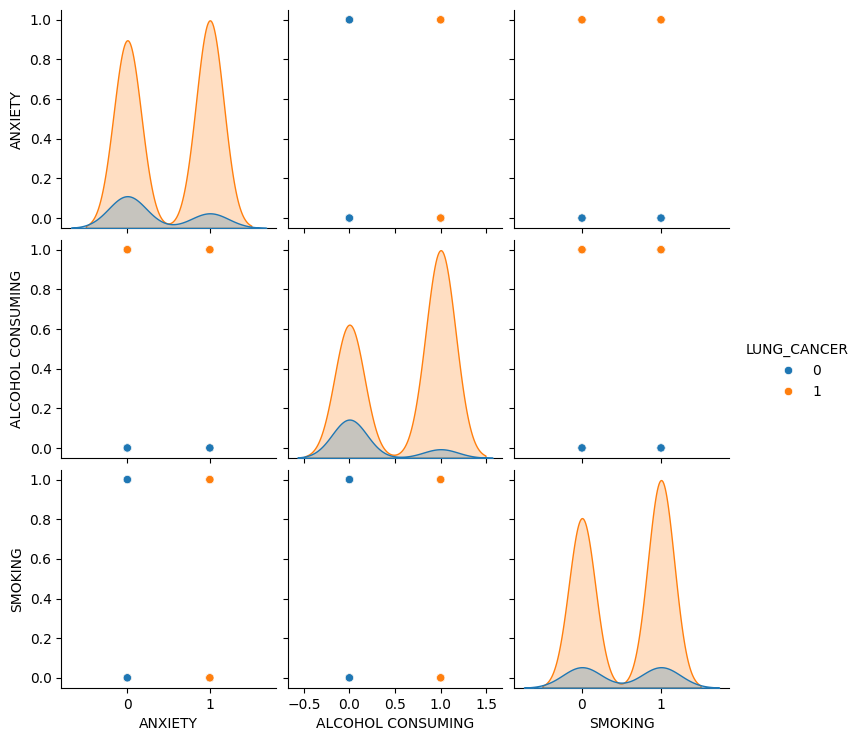

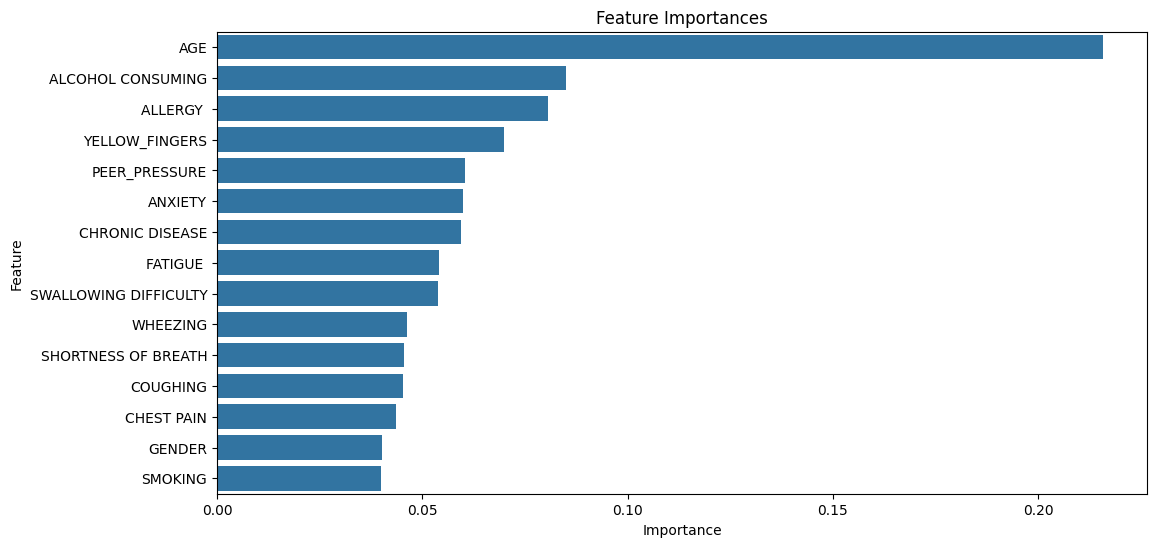

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('survey lung cancer.csv')

# Display the first few rows of the dataset
print(df.head())

# Get an overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


# Drop duplicates if any
df = df.drop_duplicates()

# Fill or drop missing values if necessary
df = df.dropna()


# normalizing all values to 0 & 1

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])


# EDA
# Check the distribution of the target variable
print(df['LUNG_CANCER'].value_counts())

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer')
plt.show()

# Check the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Check the relationship between features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='LUNG_CANCER', y=feature, data=df)
    plt.title(f'{feature} vs Lung Cancer')
    plt.show()

# Filter out non-numeric columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numerical_columns]



# Visualization of insights
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['ANXIETY', 'ALCOHOL CONSUMING', 'SMOKING', 'LUNG_CANCER']  # Replace with actual feature names
sns.pairplot(df[selected_features], hue='LUNG_CANCER')
plt.show()

# Feature importance using RandomForest
from sklearn.ensemble import RandomForestClassifier

# Assuming the target column is 'LUNG_CANCER'
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Train a RandomForest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

